<a href="https://colab.research.google.com/github/Simu-Sultana/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

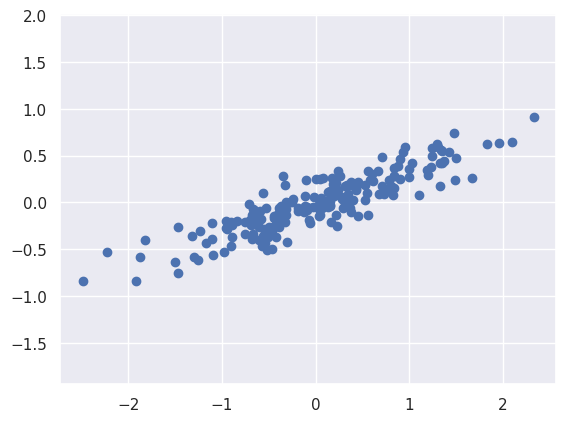

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

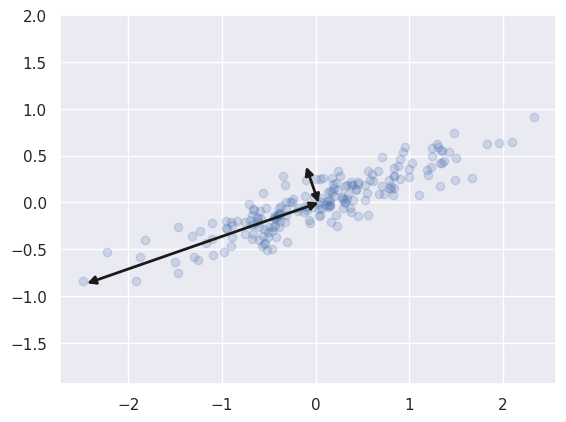

In [13]:
def draw_vector (v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(arrowstyle= '<|-|>',
                    linewidth=2, color='k',
                    shrinkA = 0, shrinkB = 0)
  ax.annotate('', v1, v0, arrowprops= arrowprops)

plt.scatter(X[:, 0], X[: , 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
   v= vector * 3 * np.sqrt(length)
   draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

**PCA as Dimensionality Reduction**

In [14]:
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

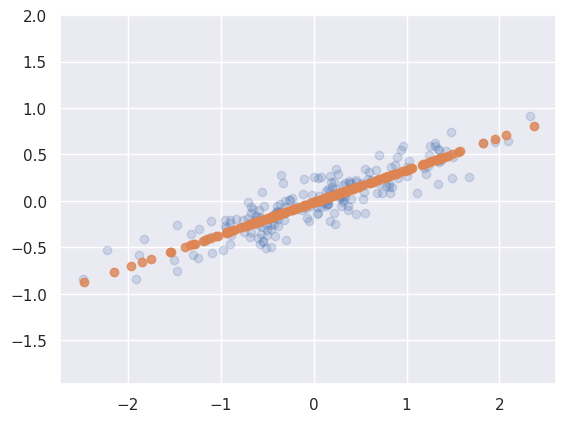

In [15]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha =0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

**PCA for visualization**

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<ipython-input-22-7e48a7257f8e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral',10))


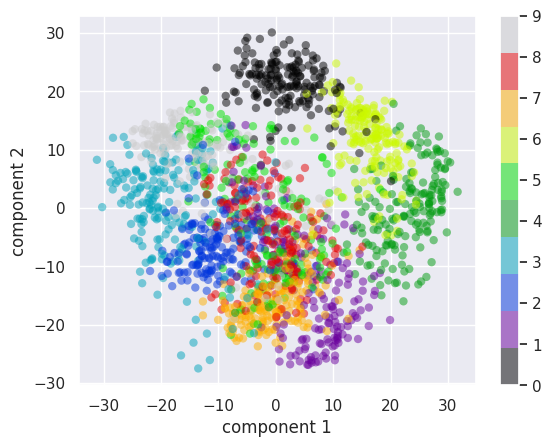

In [22]:
plt.scatter(projected[:, 0], projected[:, 1],
            c= digits.target, edgecolor= 'none', alpha=0.5,
           cmap = plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()